In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("imdb_top_250_series_episode_ratings(1).csv")
df = df[['season','episode','aggregateRating','title']]
df.columns = ['season','episode','rating','title']
avg_ratings = df.groupby(['title', 'season'])['rating'].mean().reset_index()
avg_ratings = avg_ratings[~(avg_ratings['season']=='Unknown')].reset_index()
avg_ratings['season'] = pd.to_numeric(avg_ratings['season'])
avg_ratings = avg_ratings.sort_values(by=['title', 'season'])
season_counts = avg_ratings.groupby('title')['season'].nunique()
multi_season_titles = season_counts[season_counts >= 5].index
filtered_avg_ratings = avg_ratings[avg_ratings['title'].isin(multi_season_titles)].reset_index(drop=True)


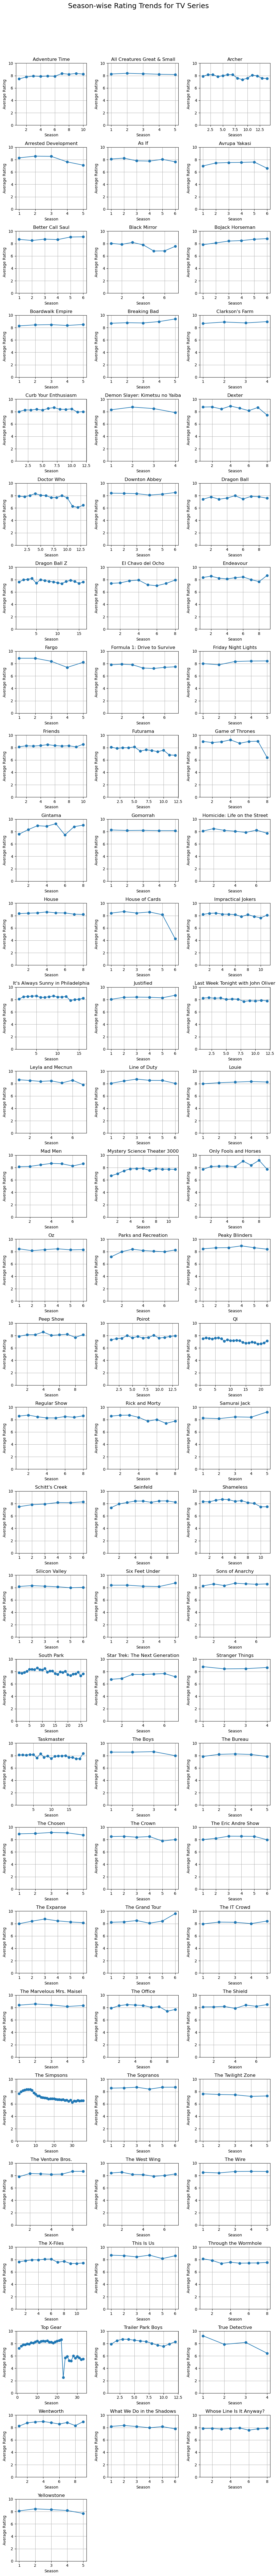

In [2]:
titles = filtered_avg_ratings['title'].unique()
n_cols = 3
n_rows = int(np.ceil(len(titles) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 3))
axes = axes.flatten()
for i, title in enumerate(titles):
    data = filtered_avg_ratings[filtered_avg_ratings['title'] == title]
    axes[i].plot(data['season'], data['rating'], marker='o')
    axes[i].set_title(title)
    axes[i].set_xlabel('Season')
    axes[i].set_ylabel('Average Rating')
    axes[i].set_ylim(0, 10)
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Season-wise Rating Trends for TV Series', fontsize=18, y=1.02)
plt.show()

# The above plot is trend of ratings v/s seasons for all the shows (individually) in my study. 

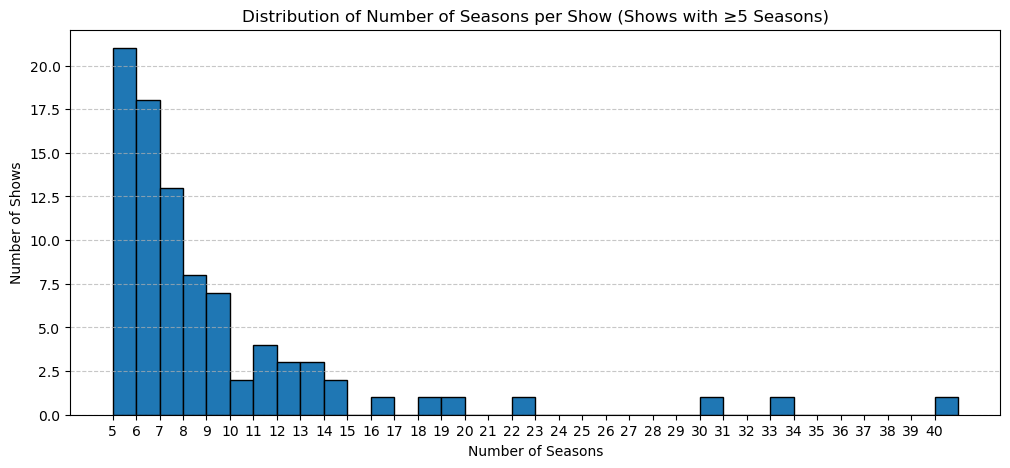

In [4]:
seasons_per_show = filtered_avg_ratings.groupby('title')['season'].nunique()
plt.figure(figsize=(12,5))
plt.hist(seasons_per_show, bins=range(5, seasons_per_show.max()+2), edgecolor='black')
plt.title('Distribution of Number of Seasons per Show (Shows with ≥5 Seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Shows')
plt.xticks(range(5, seasons_per_show.max()+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# The bargraph portrays the general statistics of the data in terms of number of seasons. This becomes important since it gives an idea on how to form equal frequency groups of the data for further study.

In [6]:
grp1 = season_counts[season_counts == 5]
grp2 = season_counts[season_counts == 6]
grp3 = season_counts[season_counts == 7]
grp4 = season_counts[season_counts.between(8,11)] 
grp5 = season_counts[season_counts.between(11,41)]


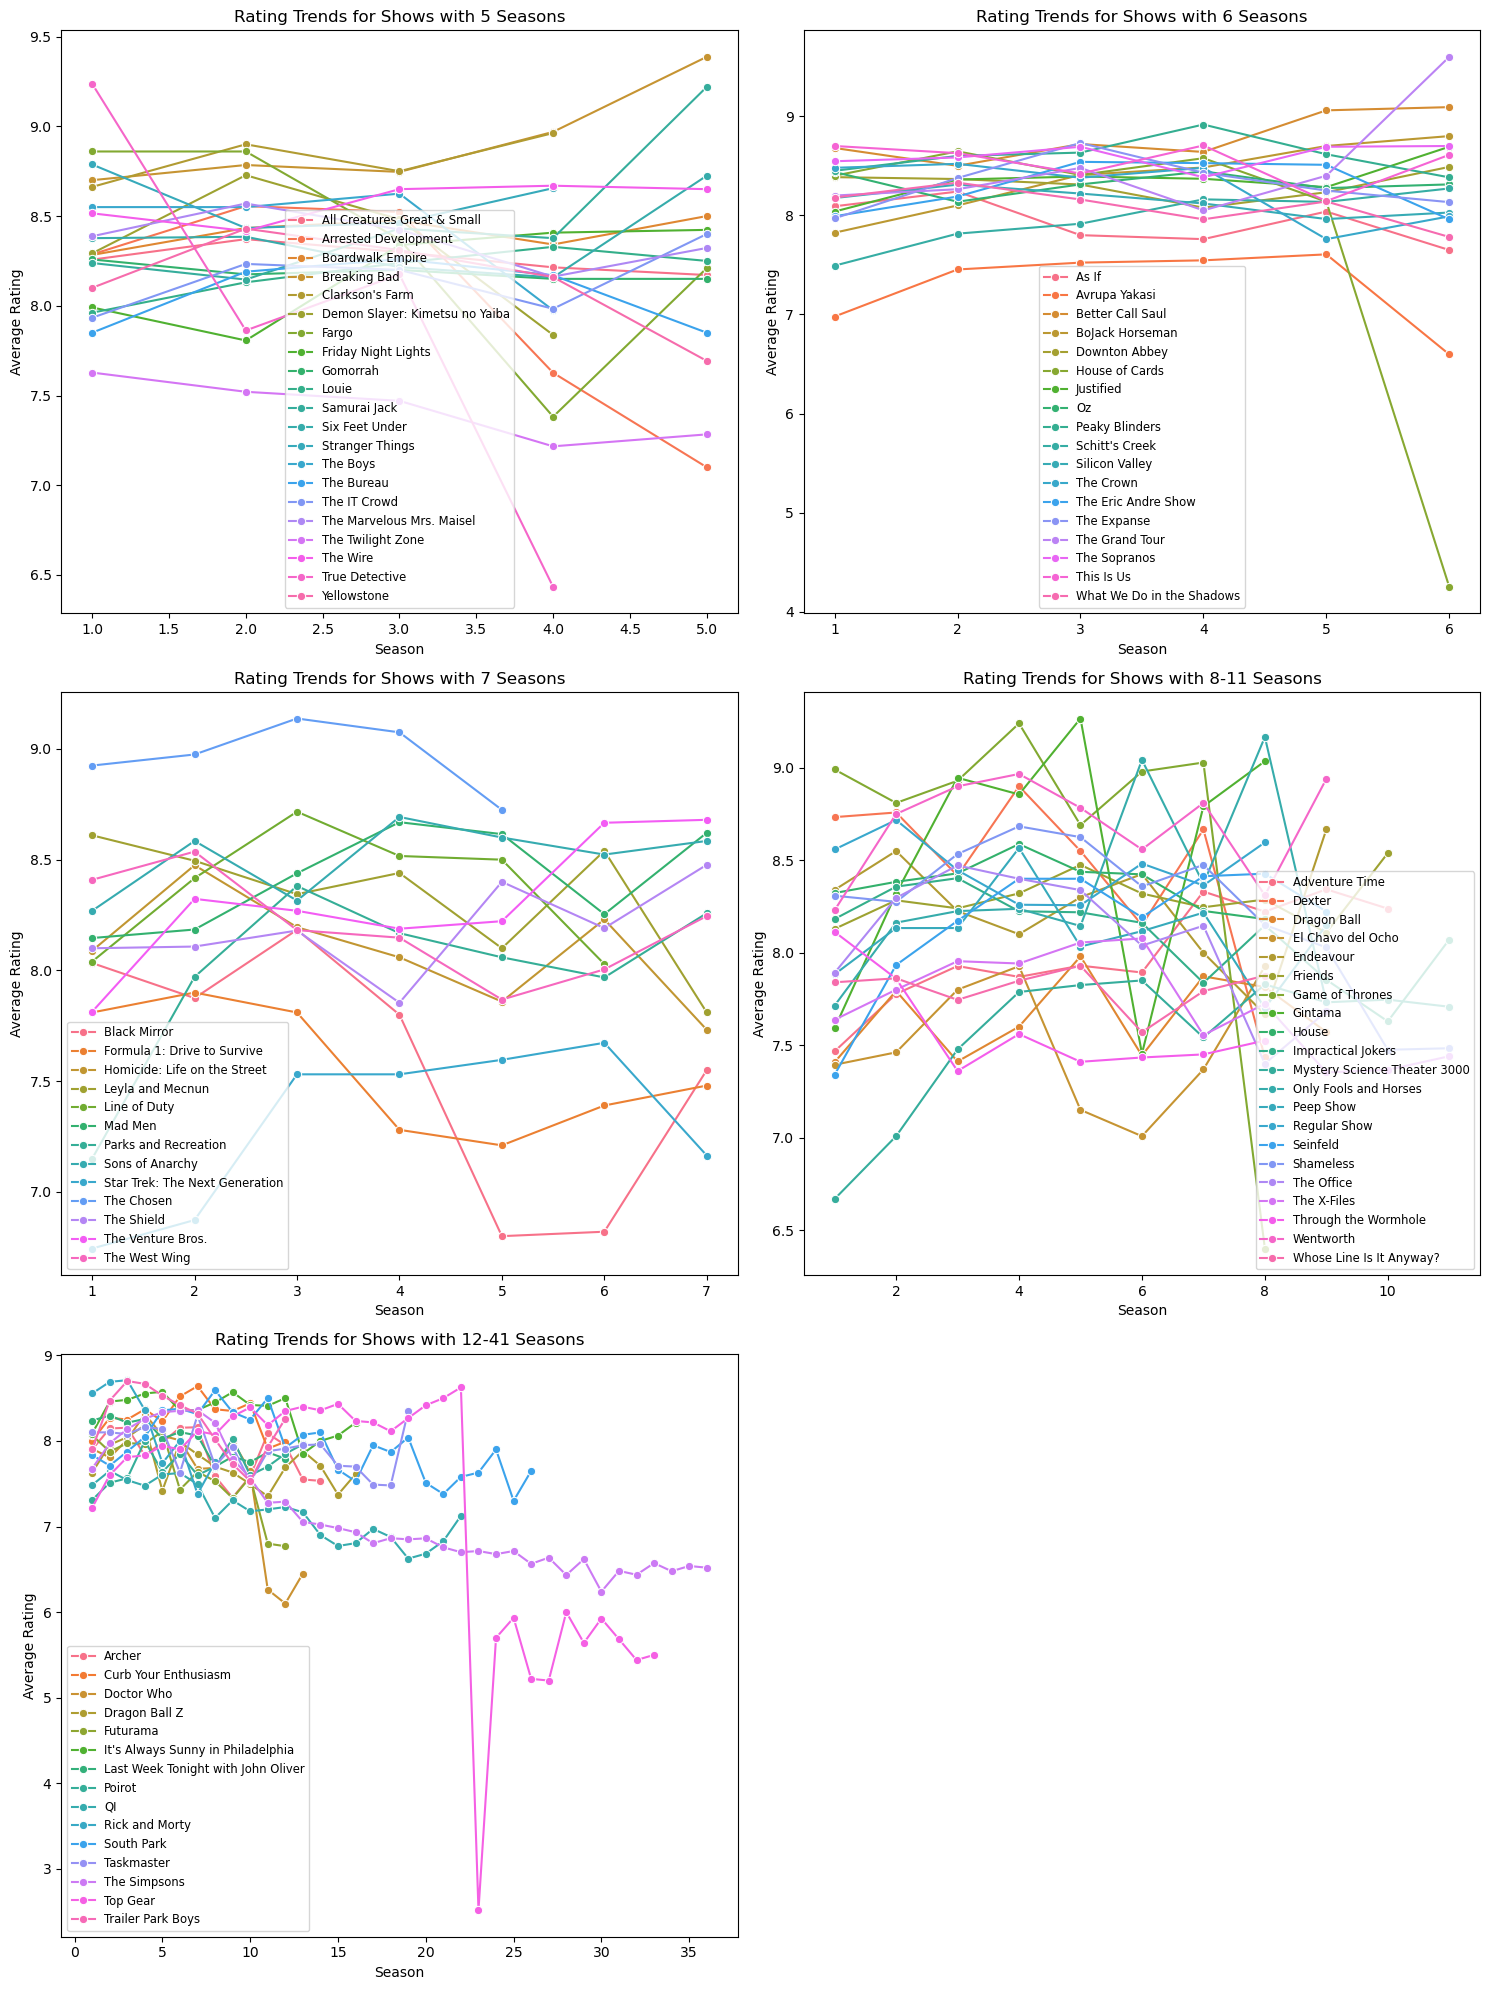

In [7]:
grp1_titles = season_counts[season_counts == 5].index
grp2_titles = season_counts[season_counts == 6].index
grp3_titles = season_counts[season_counts == 7].index
grp4_titles = season_counts[season_counts.between(8, 11)].index
grp5_titles = season_counts[season_counts.between(12, 41)].index
groups = {
    '5 Seasons': grp1_titles,
    '6 Seasons': grp2_titles,
    '7 Seasons': grp3_titles,
    '8-11 Seasons': grp4_titles,
    '12-41 Seasons': grp5_titles
}
plt.figure(figsize=(15, 20))

for i, (label, titles) in enumerate(groups.items(), 1):
    plt.subplot(3, 2, i)
    sns.lineplot(
        data=filtered_avg_ratings[filtered_avg_ratings['title'].isin(titles)],
        x='season', y='rating', hue='title', marker="o"
    )
    plt.title(f'Rating Trends for Shows with {label}')
    plt.xlabel('Season')
    plt.ylabel('Average Rating')
    plt.legend(loc='best', fontsize='small')
    plt.tight_layout()

plt.show()



# The above lineplots are a failed way to visualize since too many lineplots have clustered the graphs and it has become difficult to draw visual conclusions groupwise. Hence I decide to study all the elements of a particular group together by clubbing them and observing average trend groupwise.

In [9]:
title_avg_rating = filtered_avg_ratings.groupby('title')['rating'].mean()
title_season_count = filtered_avg_ratings.groupby('title')['season'].nunique()

correlation = title_avg_rating.corr(title_season_count)
print(f"Correlation between number of seasons and average rating: {correlation:.2f}")


Correlation between number of seasons and average rating: -0.50


# A moderately -ve correlation coefficient supports that as number of seasons increases, the ratings tend to drop.

In [11]:
group_labels = {}
for title in grp1.index:
    group_labels[title] = '5 Seasons'
for title in grp2.index:
    group_labels[title] = '6 Seasons'
for title in grp3.index:
    group_labels[title] = '7 Seasons'
for title in grp4.index:
    group_labels[title] = '8-11 Seasons'
for title in grp5.index:
    group_labels[title] = '12-41 Seasons'

filtered_avg_ratings['group'] = filtered_avg_ratings['title'].map(group_labels)

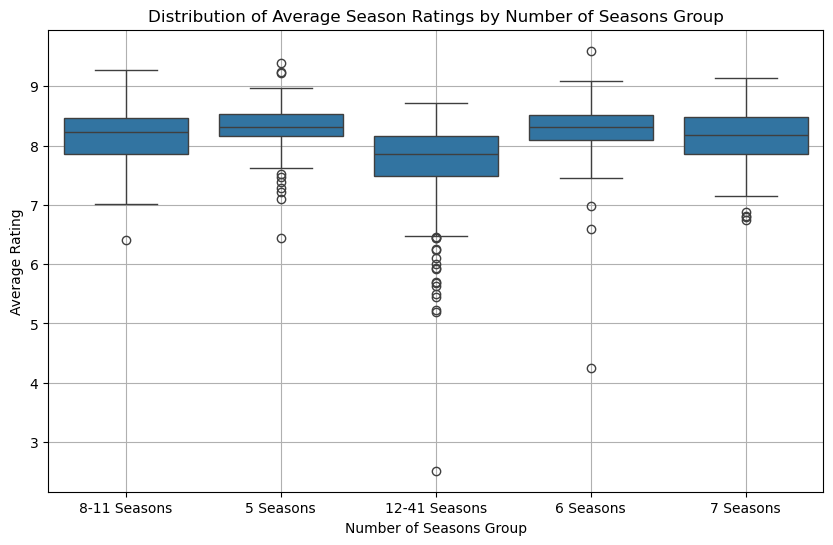

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='group', y='rating', data=filtered_avg_ratings)
plt.title('Distribution of Average Season Ratings by Number of Seasons Group')
plt.xlabel('Number of Seasons Group')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


# The above boxplots clearly show that TV shows with less number of seasons tend to have less variance in terms of quality (measured by IMDB ratings). Hence they are more consistent in quality.

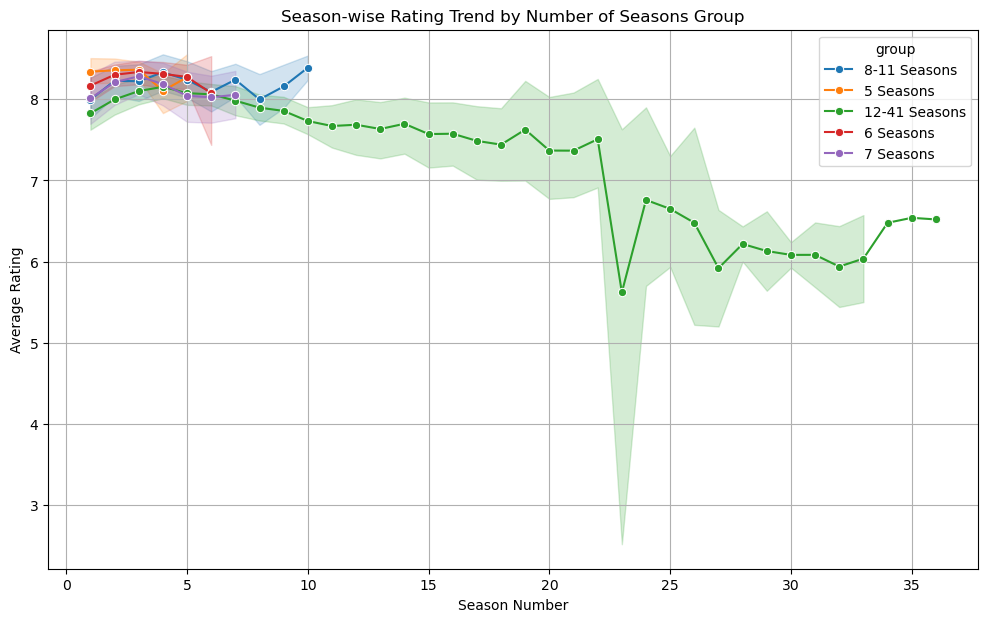

In [14]:
plt.figure(figsize=(12,7))
sns.lineplot(x='season', y='rating', hue='group', data=filtered_avg_ratings, marker='o')
plt.title('Season-wise Rating Trend by Number of Seasons Group')
plt.xlabel('Season Number')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


# From the above grouped lineplot it's clear that, for long TV shows (with 12-41 seasons), quality deteoriates as it progresses. However studying the remaining groups (less than 12 seasons) becomes difficult from this graph due to their lineplots being clustered. Hence we do the remaining study by eliminating the 12-41 seasons group.

In [16]:
alt_group_labels = {}
for title in grp1.index:
    alt_group_labels[title] = '5 Seasons'
for title in grp2.index:
    alt_group_labels[title] = '6 Seasons'
for title in grp3.index:
    alt_group_labels[title] = '7 Seasons'
for title in grp4.index:
    alt_group_labels[title] = '8-11 Seasons'

filtered_avg_ratings['alt_group'] = filtered_avg_ratings['title'].map(alt_group_labels)
alt_grouped_ratings = filtered_avg_ratings.dropna(subset=['alt_group'])

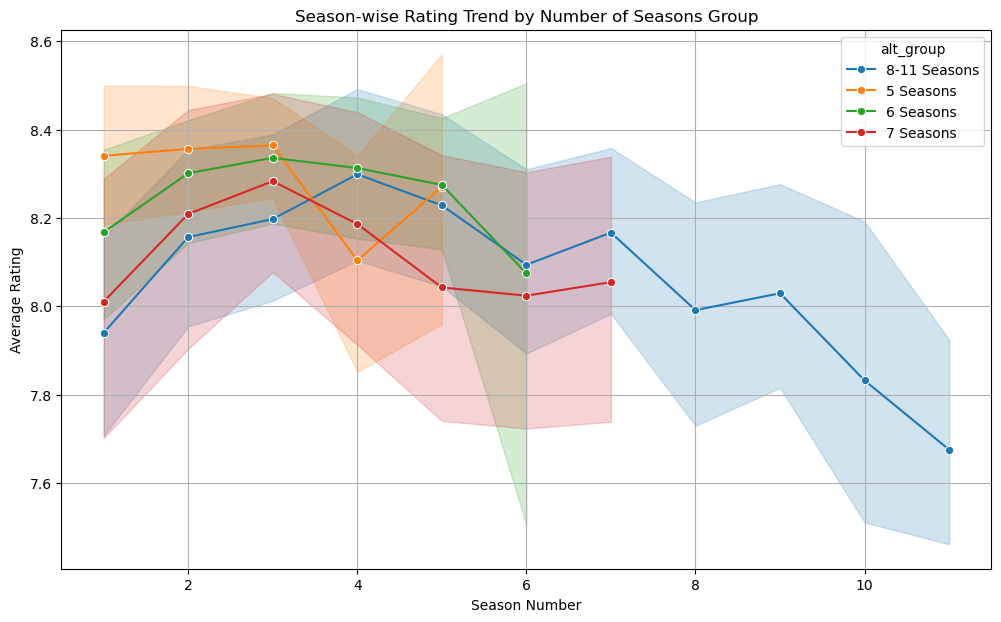

In [17]:
plt.figure(figsize=(12,7))
sns.lineplot(x='season', y='rating', hue='alt_group', data=alt_grouped_ratings, marker='o')
plt.title('Season-wise Rating Trend by Number of Seasons Group')
plt.xlabel('Season Number')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


# This shows that, in general, the TV shows with 5-11 seasons tend to peak at around 3rd / 4th season. However towards the end, they deteoriate in quality as clearly visible by the slopes of the above lineplot. 